## 데이터 불러오기

In [1]:
import pandas as pd

train = pd.read_csv('C:/Users/YH/Desktop/물류 유통량/train.csv')
test = pd.read_csv('C:/Users/YH/Desktop/물류 유통량/test.csv')

submission = pd.read_csv('C:/Users/YH/Desktop/물류 유통량/sample_submission.csv')

In [2]:
train.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [3]:
test.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,0,4167000577042200,5011000435014100,선케어
1,1,1156000009012200,5011000172034400,구강위생용품
2,2,4122000363057300,5011000361097300,캠핑
3,3,5011000436041400,2826000084036400,아웃도어가구
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7920 non-null   int64 
 1   송하인_격자공간고유번호  7920 non-null   int64 
 2   수하인_격자공간고유번호  7920 non-null   int64 
 3   물품_카테고리       7920 non-null   object
dtypes: int64(3), object(1)
memory usage: 247.6+ KB


In [6]:
train.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

## 데이터 전처리

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train['물품_카테고리'])

train['물품_카테고리'] = encoder.transform(train['물품_카테고리'])
test['물품_카테고리'] = encoder.transform(test['물품_카테고리'])

## 모델링

In [8]:
from lightgbm import LGBMRegressor

train_X = train.drop('운송장_건수',axis = 1)
train_Y = train['운송장_건수']

#모델 정의
model = LGBMRegressor()

In [9]:
# 모델 학습
model.fit(train_X,train_Y)

LGBMRegressor()

In [10]:
# test 데이터 예측
test_pred = model.predict(test)
train_pred = model.predict(train_X)

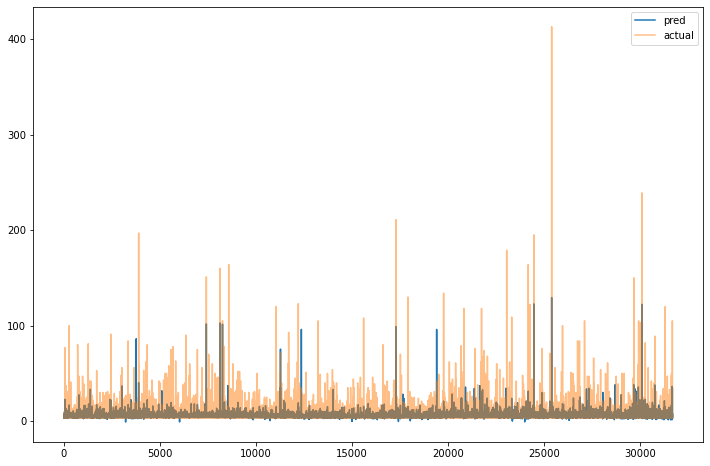

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(train_pred, label='pred')
plt.plot(train_Y, label='actual', alpha=0.5)
plt.legend(loc='upper right')

## 정답파일 생성

In [12]:
submission.to_csv('baseline.csv',index = False)